### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
from datetime import datetime
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from tensorflow.keras import metrics

### Reading data

In [2]:
bbca = pd.DataFrame(yf.download('BBCA.JK', end='2023-06-01'))
bbca.head(5)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-06-08,175.0,180.0,175.0,177.5,106.160179,499150000
2004-06-09,177.5,182.5,175.0,180.0,107.655411,294290000
2004-06-10,180.0,180.0,177.5,180.0,107.655411,165590000
2004-06-11,177.5,180.0,177.5,180.0,107.655411,135830000
2004-06-14,180.0,180.0,175.0,177.5,106.160179,158540000


In [3]:
bbca.tail(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-05-25,9100.0,9150.0,9050.0,9050.0,9050.0,76325700
2023-05-26,9175.0,9200.0,9100.0,9150.0,9150.0,55675900
2023-05-29,9250.0,9250.0,9075.0,9150.0,9150.0,79148200
2023-05-30,9200.0,9325.0,9150.0,9250.0,9250.0,97189500
2023-05-31,9300.0,9325.0,9050.0,9050.0,9050.0,722827900


In [4]:
bbca.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4707 entries, 2004-06-08 to 2023-05-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       4707 non-null   float64
 1   High       4707 non-null   float64
 2   Low        4707 non-null   float64
 3   Close      4707 non-null   float64
 4   Adj Close  4707 non-null   float64
 5   Volume     4707 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 257.4 KB


In [5]:
bbca[['Close']].isna().sum()

Close    0
dtype: int64

In [6]:
bbca['Date'] = bbca.index
bbca['Date'] = pd.to_datetime(bbca['Date'])

### Data Preparation

In [7]:
from sklearn.preprocessing import MinMaxScaler

close = bbca[['Close']]

minmax = MinMaxScaler(feature_range=(0,1))
normalized = minmax.fit_transform(close.values)

print("Print the normalized data :")
normalized

Print the normalized data :


array([[0.00000000e+00],
       [2.74047684e-04],
       [2.74047684e-04],
       ...,
       [9.83557139e-01],
       [9.94519046e-01],
       [9.72595232e-01]])

In [8]:
testing_len = len(bbca.last('180D'))
training_len = len(bbca) - testing_len

print("The length of training data is {} datas".format(training_len))
print("The length of testing  data is {} datas".format(testing_len))

The length of training data is 4590 datas
The length of testing  data is 117 datas


In [9]:
train = normalized[0:training_len, :]

x_train = []
y_train = []

for i in range(60, len(train)):
    x_train.append(train[i-60:i, 0])
    y_train.append(train[i, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [10]:
print("Print the 1st x_train and y_train data:")
print(x_train[0])
print(y_train[0])

Print the 1st x_train and y_train data:
[[0.        ]
 [0.00027405]
 [0.00027405]
 [0.00027405]
 [0.        ]
 [0.0005481 ]
 [0.00027405]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.00027405]
 [0.00027405]
 [0.0005481 ]
 [0.0005481 ]
 [0.00082214]
 [0.00109619]
 [0.        ]
 [0.00027405]
 [0.00027405]
 [0.00109619]
 [0.00109619]
 [0.00109619]
 [0.00137024]
 [0.00137024]
 [0.00164429]
 [0.00109619]
 [0.00109619]
 [0.00137024]
 [0.00137024]
 [0.00137024]
 [0.00137024]
 [0.00137024]
 [0.00137024]
 [0.00109619]
 [0.00109619]
 [0.00109619]
 [0.00109619]
 [0.00109619]
 [0.00082214]
 [0.00109619]
 [0.00137024]
 [0.00137024]
 [0.00109619]
 [0.0005481 ]
 [0.0005481 ]
 [0.00082214]
 [0.0005481 ]
 [0.0005481 ]
 [0.00027405]
 [0.00027405]
 [0.00082214]
 [0.00082214]
 [0.0005481 ]
 [0.0005481 ]
 [0.0005481 ]
 [0.00027405]
 [0.00027405]
 [0.0005481 ]
 [0.        ]]
0.0002740476842970664


In [11]:
print("Jumlah data x_train adalah sebanyak {} datas".format(x_train.shape[0]))
print("Jumlah data y_train adalah sebanyak {} datas".format(y_train.shape[0]))

Jumlah data x_train adalah sebanyak 4530 datas
Jumlah data y_train adalah sebanyak 4530 datas


In [12]:
test = normalized[training_len - 60: , :]

x_test = []
y_test = close[training_len:]
for i in range(60, len(test)):
    x_test.append(test[i-60:i, 0])
    
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

In [13]:
print("Print the 1st x_test and y_test data:")
print(x_test[0])
print(normalized[training_len:])

Print the 1st x_test and y_test data:
[[0.89860236]
 [0.91504522]
 [0.91230474]
 [0.93970951]
 [0.90682379]
 [0.9287476 ]
 [0.91778569]
 [0.90956426]
 [0.90956426]
 [0.89860236]
 [0.90408331]
 [0.89038093]
 [0.8931214 ]
 [0.89860236]
 [0.91778569]
 [0.91230474]
 [0.91778569]
 [0.90682379]
 [0.90408331]
 [0.87941902]
 [0.89038093]
 [0.88489997]
 [0.8931214 ]
 [0.88764045]
 [0.88489997]
 [0.88489997]
 [0.89038093]
 [0.88764045]
 [0.91230474]
 [0.9287476 ]
 [0.95615237]
 [0.93422856]
 [0.91778569]
 [0.93422856]
 [0.93970951]
 [0.94519046]
 [0.94519046]
 [0.93970951]
 [0.94519046]
 [0.94244999]
 [0.95067142]
 [0.93970951]
 [0.95341189]
 [0.94519046]
 [0.95067142]
 [0.93970951]
 [0.94519046]
 [0.92326665]
 [0.93696903]
 [0.94793094]
 [0.93696903]
 [0.95615237]
 [0.95341189]
 [0.96711428]
 [0.9643738 ]
 [0.96985475]
 [0.9643738 ]
 [1.        ]
 [0.96711428]
 [0.95615237]]
[[0.94244999]
 [0.93148808]
 [0.90682379]
 [0.91230474]
 [0.92052617]
 [0.93422856]
 [0.93422856]
 [0.92600713]
 [0.91230

In [14]:
print("Jumlah data x_test adalah sebanyak {} data".format(x_test.shape[0]))
print("Jumlah data y_test adalah sebanyak {} data".format(y_test.shape[0]))

Jumlah data x_test adalah sebanyak 117 data
Jumlah data y_test adalah sebanyak 117 data


### Creating Model
#### 1. Optimizer Adam

In [15]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [16]:
model.compile(optimizer='adam', loss='mean_absolute_error')

In [17]:
from keras import callbacks
earlystopping = callbacks.EarlyStopping(monitor="loss", mode="min", patience=5, restore_best_weights=True)
model.fit(x_train, y_train, batch_size=1, epochs=50, callbacks=[earlystopping])

Epoch 1/50
4530/4530 [==============================] - 210s 44ms/step - loss: 0.0259
Epoch 2/50
4530/4530 [==============================] - 187s 41ms/step - loss: 0.0132
Epoch 3/50
4530/4530 [==============================] - 187s 41ms/step - loss: 0.0104
Epoch 4/50
4530/4530 [==============================] - 187s 41ms/step - loss: 0.0096
Epoch 5/50
4530/4530 [==============================] - 187s 41ms/step - loss: 0.0086
Epoch 6/50
4530/4530 [==============================] - 185s 41ms/step - loss: 0.0083
Epoch 7/50
4530/4530 [==============================] - 183s 40ms/step - loss: 0.0077
Epoch 8/50
4530/4530 [==============================] - 187s 41ms/step - loss: 0.0075
Epoch 9/50
4530/4530 [==============================] - 186s 41ms/step - loss: 0.0073
Epoch 10/50
4530/4530 [==============================] - 187s 41ms/step - loss: 0.0072
Epoch 11/50
4530/4530 [==============================] - 187s 41ms/step - loss: 0.0069
Epoch 12/50
4530/4530 [=============================

### Predicting

In [18]:
predictions = model.predict(x_test)
predictions = minmax.inverse_transform(predictions)

4/4 [==============================] - 2s 64ms/step


### Evaluation

In [19]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, predictions)

102.12224559294872

In [20]:
from sklearn.metrics import mean_squared_error, r2_score
mean_squared_error(y_test, predictions, squared=False)

129.1801769280871

In [21]:
r2_score(y_test, predictions)

0.7596365272404768

### Visualizing

In [22]:
train = close[:training_len]
valid = close[training_len:]
valid = pd.DataFrame(valid)
valid = valid.rename(columns={0 : 'Close'})
valid['Predictions'] = predictions.reshape(-1, 1)

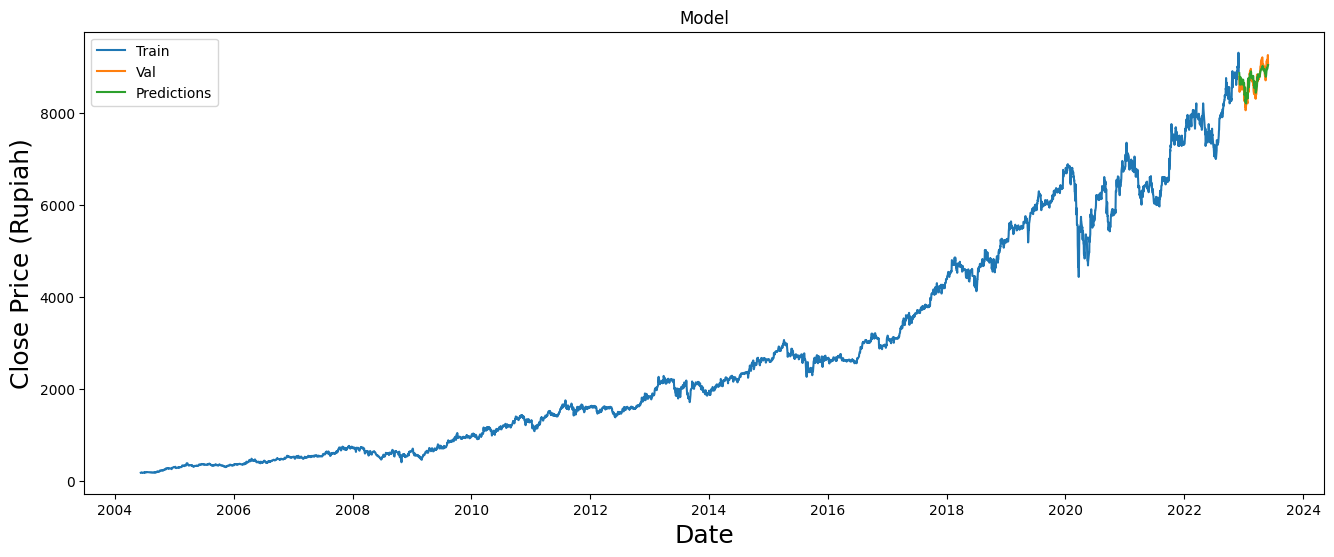

In [23]:
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price (Rupiah)', fontsize=18)
plt.plot(train)
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='upper left')
plt.show()

##### 2. Optimizer SGD

In [24]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [25]:
model.compile(optimizer='SGD', loss='mean_absolute_error')

In [26]:
from keras import callbacks
earlystopping = callbacks.EarlyStopping(monitor="loss", mode="min", patience=5, restore_best_weights=True)
model.fit(x_train, y_train, batch_size=1, epochs=50, callbacks=[earlystopping])

Epoch 1/50
4530/4530 [==============================] - 184s 40ms/step - loss: 0.0442
Epoch 2/50
4530/4530 [==============================] - 197s 43ms/step - loss: 0.0179
Epoch 3/50
4530/4530 [==============================] - 184s 41ms/step - loss: 0.0154
Epoch 4/50
4530/4530 [==============================] - 182s 40ms/step - loss: 0.0141
Epoch 5/50
4530/4530 [==============================] - 186s 41ms/step - loss: 0.0132
Epoch 6/50
4530/4530 [==============================] - 183s 40ms/step - loss: 0.0124
Epoch 7/50
4530/4530 [==============================] - 184s 41ms/step - loss: 0.0118
Epoch 8/50
4530/4530 [==============================] - 184s 41ms/step - loss: 0.0115
Epoch 9/50
4530/4530 [==============================] - 183s 40ms/step - loss: 0.0109
Epoch 10/50
4530/4530 [==============================] - 184s 41ms/step - loss: 0.0105
Epoch 11/50
4530/4530 [==============================] - 183s 40ms/step - loss: 0.0103
Epoch 12/50
4530/4530 [=============================

### Predicting

In [27]:
predictions = model.predict(x_test)
predictions = minmax.inverse_transform(predictions)

4/4 [==============================] - 1s 40ms/step


### Evaluation

In [28]:
mean_absolute_error(y_test, predictions)

162.27727697649573

In [29]:
mean_squared_error(y_test, predictions, squared=False)

196.67852690754953

In [30]:
r2_score(y_test, predictions)

0.44282629331057466

### Visualizing

In [31]:
train = close[:training_len]
valid = close[training_len:]
valid = pd.DataFrame(valid)
valid = valid.rename(columns={0 : 'Close'})
valid['Predictions'] = predictions.reshape(-1, 1)

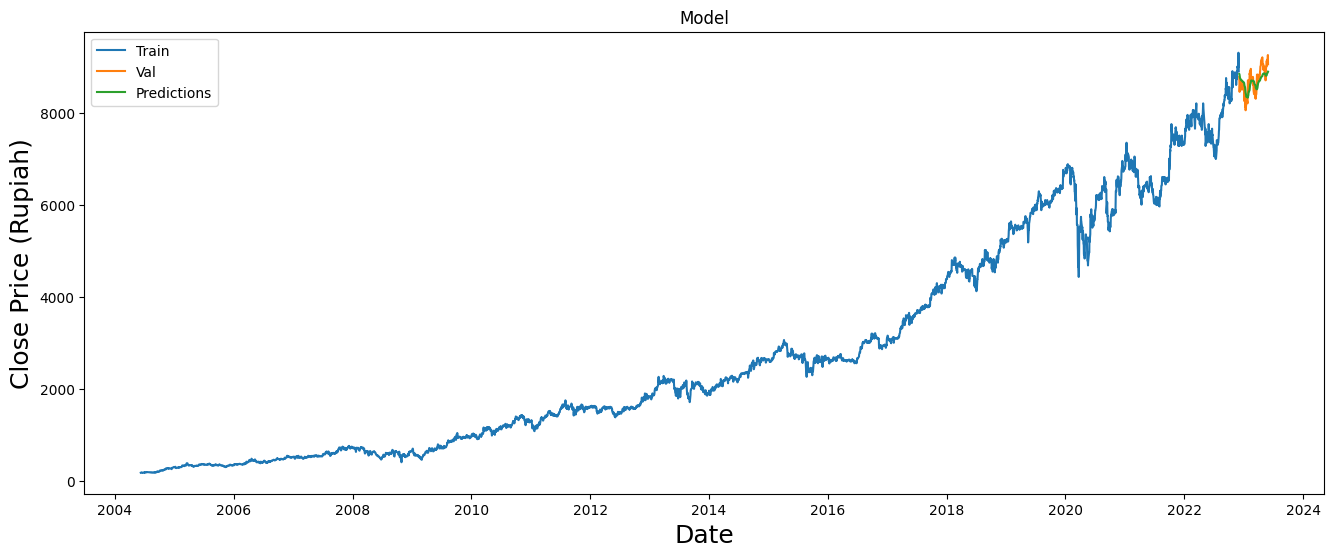

In [32]:
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price (Rupiah)', fontsize=18)
plt.plot(train)
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='upper left')
plt.show()

In [1]:
!jupyter nbconvert --to html "./00000053897_Jacintha Cordelie_SourceCode_UAS_IF540L.ipynb" --output-dir="./"

[NbConvertApp] Converting notebook ./00000053897_Jacintha Cordelie_SourceCode_UAS_IF540L.ipynb to html
[NbConvertApp] Writing 803695 bytes to 00000053897_Jacintha Cordelie_SourceCode_UAS_IF540L.html
